import sip
sip.setapi('QString', 2)
sip.setapi('QVariant', 2)

In [16]:
#from mayavi import mlab as ml
import os, sys
import string as str
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import numpy as np

In [17]:
#from geomag import *
#from datetime import date

In [18]:
%matplotlib inline

### Diretorio do EDI

In [19]:
#path ="C:/Users/fsolon/Google Drive/Python/EDI/teste/"
path ="C:/Tipper/EDIS_for_tipper/"
#path = "C:/Users/Flora/Google Drive/Python/EDI/edi_data/"
dirs = os.listdir(path)
#for f in dirs:
#    print f

In [20]:
def convert_coord(coord):
    '''
    Essa função converte coordenadas geográficas 
    no formato grau min seg para décimo de grau
    
    coord = 1D array contento as coordenadas que se deseja modificar, ex latitude
    
    '''
    
    
    ponto = str.find(coord, ':')
    degree = coord[0:ponto]
    degree = float(degree)

    minute = coord[ponto+1:ponto+3]
    minute = float(minute)

    second = coord[ponto+4:]
    second = float(second)

    s = second/60.
    m = minute+s
    mm = m/60.0
    d = degree-mm
    
    return d

def inf_desejada(N,lines, inicio, final):
    
    '''
    Essa funçao busca no arquivo edi aberto anteriormente as 
    informações entre os blocos desejados
    
    N = número de linhas do arquivo
    lines = Lista contendo todas as linhas do arquivo (deve ser obtida anteriormente)
    inicio = conjunto de caracteres que definem o inicio do bloco. Deve ser fornecido como string
    final = conjunto de caracteres que definem o inicio do bloco. Deve ser fornecido como string
    '''
    
    g = []
    f = np.array([])
    for i, linha in enumerate(lines):
        if str.find(linha, inicio) == 0:
            break
    for j in range (i+1,N):
        if str.find(lines[j], final) == 0:
            break
        else:
            g = lines[j].split()
            for k in range(len(g)):
                g[k] = float(g[k])
                f = np.hstack((f,g[k]))
    return f

In [21]:

coord_x = np.zeros(len(dirs))
coord_y = np.zeros(len(dirs))
id_station = np.zeros(len(dirs))
i = 0

## CHECAR AS LINHAS DAS COORDENADAS NO EDI

for f in dirs:
    with open(path+f, 'r') as edi_file:
        lines = edi_file.readlines()
        latitude = lines[8][4:]
        longitude = lines[9][5:]
        elevation = lines[10][5:]    
        lon = convert_coord(longitude)
        lat = convert_coord(latitude)
        coord_x[i] = lon
        coord_y[i] = lat 
        print f
        i = i+1

        # ESPECIFICO FLORA
#        id_station[i] = f[0:3]
#    i = i+1

#### CUidado! sÓ PARA OS EDIS DA fLORA!
    # As coordenadas das estações 99, 117 e 135 estão erradas no arquivo edi e foram corrigidas manualmente abaixo.



PC02_301b_ON.edi
PC02_302a_ON.edi
PC02_303a_ON.edi
PC02_304b_ON.edi
PC02_305a_ON.edi
PC02_306a_ON.edi
PC02_307a_ON.edi
PC02_308c_ON.edi
PC02_309a_ON.edi
PC02_310a_ON.edi
PC02_311a_ON.edi
PC02_312a_ON.edi
PC02_313a_ON.edi
PC02_314d_ON.edi
PC02_315a_ON.edi
PC02_316b_ON.edi
PC02_317b_ON.edi
PC02_318a_ON.edi
PC02_319a_ON.edi
PC02_320b_ON.edi
PC02_321a_ON.edi
PC02_322a_ON.edi
PC02_323a_ON.edi
PC02_324a_ON.edi
PC02_325a_ON.edi
PC02_326a_ON.edi
PC02_327a_ON.edi
PC02_328a_ON.edi
PC02_329a_ON.edi
PC02_330a_ON.edi
PC02_331a_ON.edi
PC02_332a_ON.edi
PC02_333b_ON.edi
PC02_334a_ON.edi
PC02_335a_ON.edi
PC02_336a_ON.edi
PC02_337c_ON.edi
PC02_338a_ON.edi
PC02_339a_ON.edi
PC02_340a_ON.edi
PC02_341b_ON.edi
PC02_342a_ON.edi
PC02_343b_ON.edi
PC02_344a_ON.edi
PC02_345a_ON.edi
PC02_346b_ON.edi
PC02_347a_ON.edi
PC02_348a_ON.edi
PC02_349a_ON.edi
PC02_350a_ON.edi
PC02_351a_ON.edi
PC02_352a_ON.edi
PC02_353a_ON.edi
PC02_354b_ON.edi
PC02_355c_ON.edi
PC02_356a_ON.edi
PC02_357a_ON.edi
PC02_358a_ON.edi
PC02_359c_ON.e

In [22]:
#D = [None] * len(dirs)
D = []
x = np.array([])
y = np.array([])

for i,files in enumerate(dirs):
    with open(path+files, 'r') as edi_file:
        lines = edi_file.readlines()
        N = len(lines)
        txr = inf_desejada(N,lines,'>TXR.EXP','>TXI.EXP')
        if txr.size != 0:
#            x = coord_x[i]
#            y = coord_y[i]
            tyr = inf_desejada(N,lines,'>TYR.EXP','>TYI.EXP')
            f  = inf_desejada(N,lines,'>FREQ','>!****IMPEDANCE')
            D.append(np.vstack((f,txr,tyr)))
            x = np.hstack((x,coord_x[i]))
            y = np.hstack((y,coord_y[i]))
# Calcular declinação magnética em cada coordenada

#declinacao = np.zeros(len(x))
#for i in range(len(x)):
#    declinacao[i] = declination(x[i],y[i],time=(date(2013,7,17)))
#dec = np.deg2rad(declinacao)
#dec = np.deg2rad(-22.)

In [81]:
Tx = np.zeros(len(D))
Ty = np.zeros(len(D))
f = np.zeros(len(D))



#Escolher período de interesse
Tmin = 500
Tmax = 1000

fmin = 1./Tmax
fmax = 1./Tmin
for i in range(len(D)):
    c = (D[i][0]>=fmin) & (D[i][0]<=fmax)
    f[i] = np.mean(D[i][0][c])
    Tx[i] = np.mean(D[i][1][c])
    Ty[i] = np.mean(D[i][2][c])
    
# Array contendo o vetor Tipper para cada estação
Tipper = np.vstack((Tx,Ty)).T
#print Tipper
# Rotação do Tipper para o Norte geográfico - dec = declinacao em radianos

Tipper_rot_x = np.cos(np.deg2rad(-18.))*Tipper[:,0] - np.sin(np.deg2rad(-18.))*Tipper[:,1]
Tipper_rot_y = np.sin(np.deg2rad(-18.))*Tipper[:,0] + np.cos(np.deg2rad(-18.))*Tipper[:,1]

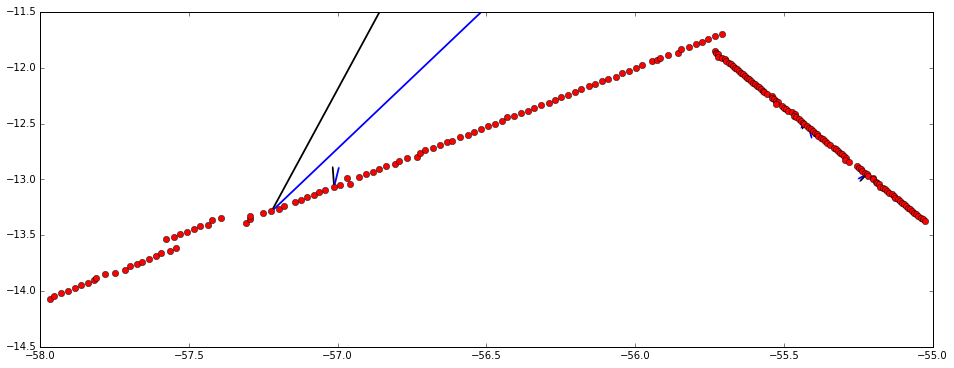

In [82]:
# Plot do Tipper e Tipper rotacionado

plt.figure(figsize =(16,6))
plt.plot(coord_x, coord_y,'ro')
ax2 = plt.gca()
ax2.quiver(x,y,Tx,Ty, headwidth=1, headlength=1,width=0.002)
ax2.quiver(x,y,Tipper_rot_x,Tipper_rot_y, headwidth=1, headlength=1,width=0.002,color='b')
plt.show()

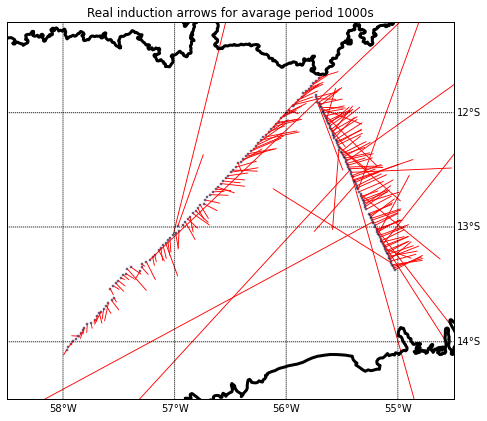

In [83]:
plt.figure(figsize=(8,8))
# ALTERAR AQUI
m = Basemap(llcrnrlon=-58.5,llcrnrlat=-14.5,urcrnrlon=-54.5,urcrnrlat=-11.2,projection='merc', resolution='i')
#m.drawcoastlines()
m.drawcountries()
#m.etopo()
m.drawstates()
#m.fillcontinents()
m.drawmapboundary()
parallels = np.arange(-15.,-11.,1)
m.drawparallels(parallels,labels=[0,1,1,0])
meridians = np.arange(-58.,-54.,1.)
m.drawmeridians(meridians,labels=[1,0,0,1])
#Shape da bacia
m.readshapefile('C:/Tipper/Parecis/gis/Parecis','Parecis.shp',linewidth=3)

# link shape do brasil
# http://geobank.cprm.gov.br/pls/publico/geobank.website.mapas?p_webmap=N&p_pagina=download_vetoriais&p_usuario=1

# Shape das estruturas ceara
#m.readshapefile('C:/Users/fsolon/Google Drive/Python/EDI/shape/ceara/Estruturas','Estruturas.shp',linewidth=1)
# Shape das estruturas piau
#m.readshapefile('C:/Users/fsolon/Google Drive/Python/EDI/shape/piaui/Estruturas_Geologicas/Estruturas_Geologicas','Estruturas_Geologicas.shp',linewidth=1)
# Shape das estruturas maranhao
#m.readshapefile('C:/Users/fsolon/Google Drive/Python/EDI/shape/maranhao/SA23_Saoluis_estrut','SA23_Saoluis_estrut.shp',linewidth=1)
# Shape das estruturas teresina
#m.readshapefile('C:/Users/fsolon/Google Drive/Python/EDI/shape/teresina/SB23_Teresina_estrut','SB23_Teresina_estrut.shp',linewidth=1)
xi,yi = m(coord_x,coord_y)
xx,yy = m(x,y)
#Aparecer estaçoes
plt.scatter(xx,yy,s=3,alpha=0.5)
Q = m.quiver(xx,yy,Tipper_rot_x,Tipper_rot_y,scale=5, headwidth=1, headlength=1,width=0.002,color='r')
plt.title('Real induction arrows for avarage period 1000s',)
plt.savefig('tipper_linha2e7_1000s.png',dpi=300)
plt.show()
